# import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Exploring IKEA dataset

In [ ]:
ikea=pd.read_csv('/content/ikea.csv')
ikea.head()

,Unnamed: 0,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
ikea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3694 entries, 0 to 3693
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3694 non-null   int64  
 1   item_id            3694 non-null   int64  
 2   name               3694 non-null   object 
 3   category           3694 non-null   object 
 4   price              3694 non-null   float64
 5   old_price          3694 non-null   object 
 6   sellable_online    3694 non-null   bool   
 7   link               3694 non-null   object 
 8   other_colors       3694 non-null   object 
 9   short_description  3694 non-null   object 
 10  designer           3694 non-null   object 
 11  depth              2231 non-null   float64
 12  height             2706 non-null   float64
 13  width              3105 non-null   float64
dtypes: bool(1), float64(4), int64(2), object(7)
memory usage: 378.9+ KB


# **DATA PRE-PROCESSING**

Data Cleaning & Manipulation

In [ ]:
# drop unused column
ikea=ikea.drop('Unnamed: 0',axis=1)

In [ ]:
ikea.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0


In [ ]:
# Count null values
ikea.isnull().sum()

item_id                 0
name                    0
category                0
price                   0
old_price               0
sellable_online         0
link                    0
other_colors            0
short_description       0
designer                0
depth                1463
height                988
width                 589
dtype: int64

In [ ]:
# Check if there any duplicated values
ikea.duplicated().sum()

0

In [ ]:
# Count the median value for depth for each categories
median_depth=ikea[['category','depth']].groupby('category',as_index=False)['depth'].median().rename(columns=({'depth':'medianDepth'}))
median_depth


,category,medianDepth
0,Bar furniture,47.0
1,Beds,88.0
2,Bookcases & shelving units,36.0
3,Cabinets & cupboards,38.0
4,Café furniture,46.5
5,Chairs,53.5
6,Chests of drawers & drawer units,47.0
7,Children's furniture,45.0
8,Nursery furniture,44.0
9,Outdoor furniture,67.0


In [ ]:
# Count the median value for height for each categories
median_height=ikea[['category','height']].groupby('category',as_index=False)['height'].median().rename(columns=({'height':'medianHeight'}))
median_height

,category,medianHeight
0,Bar furniture,102.0
1,Beds,84.0
2,Bookcases & shelving units,147.0
3,Cabinets & cupboards,101.0
4,Café furniture,77.5
5,Chairs,77.0
6,Chests of drawers & drawer units,73.0
7,Children's furniture,67.0
8,Nursery furniture,86.5
9,Outdoor furniture,73.0


In [ ]:
# Count the median value for height for each categories
median_width=ikea[['category','width']].groupby('category',as_index=False)['width'].median().rename(columns=({'width':'medianWidth'}))
median_width

,category,medianWidth
0,Bar furniture,48.0
1,Beds,140.0
2,Bookcases & shelving units,81.0
3,Cabinets & cupboards,80.0
4,Café furniture,53.0
5,Chairs,67.0
6,Chests of drawers & drawer units,67.0
7,Children's furniture,56.0
8,Nursery furniture,60.0
9,Outdoor furniture,62.5


In [ ]:
# Create new dataframe that contain the median for each dimensions, from each categories
median_size=pd.merge((pd.merge(median_depth,median_height,on='category',how='left')),median_width,on='category',how='left')
median_size

,category,medianDepth,medianHeight,medianWidth
0,Bar furniture,47.0,102.0,48.0
1,Beds,88.0,84.0,140.0
2,Bookcases & shelving units,36.0,147.0,81.0
3,Cabinets & cupboards,38.0,101.0,80.0
4,Café furniture,46.5,77.5,53.0
5,Chairs,53.5,77.0,67.0
6,Chests of drawers & drawer units,47.0,73.0,67.0
7,Children's furniture,45.0,67.0,56.0
8,Nursery furniture,44.0,86.5,60.0
9,Outdoor furniture,67.0,73.0,62.5


In [ ]:
# Merge the median dataframe with existing dataframe
ikea_clean=pd.merge(ikea,median_size,on='category',how='left')
ikea_clean.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,medianDepth,medianHeight,medianWidth
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,NaN,99.0,51.0,47.0,102.0,48.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,NaN,105.0,80.0,47.0,102.0,48.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,NaN,NaN,NaN,47.0,102.0,48.0
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,47.0,102.0,48.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,47.0,102.0,48.0


In [ ]:
# Fill the null values in each dimension column,
# with the average median value
ikea_clean['depth']=ikea_clean['depth'].fillna(ikea_clean['medianDepth'])
ikea_clean['width']=ikea_clean['width'].fillna(ikea_clean['medianWidth'])
ikea_clean['height']=ikea_clean['height'].fillna(ikea_clean['medianHeight'])

# Let's check it again!
ikea_clean.isnull().sum()

item_id              0
name                 0
category             0
price                0
old_price            0
sellable_online      0
link                 0
other_colors         0
short_description    0
designer             0
depth                0
height               0
width                0
medianDepth          0
medianHeight         0
medianWidth          0
dtype: int64

In [ ]:
# Drop the Median Columns

ikea_clean.drop(['medianDepth','medianHeight','medianWidth'],axis=1,inplace=True)

In [ ]:
ikea_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3694 entries, 0 to 3693
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            3694 non-null   int64  
 1   name               3694 non-null   object 
 2   category           3694 non-null   object 
 3   price              3694 non-null   float64
 4   old_price          3694 non-null   object 
 5   sellable_online    3694 non-null   bool   
 6   link               3694 non-null   object 
 7   other_colors       3694 non-null   object 
 8   short_description  3694 non-null   object 
 9   designer           3694 non-null   object 
 10  depth              3694 non-null   float64
 11  height             3694 non-null   float64
 12  width              3694 non-null   float64
dtypes: bool(1), float64(4), int64(1), object(7)
memory usage: 378.8+ KB


In [ ]:
# create new column product volume [ D X H X W ]

ikea_clean['volume']=ikea_clean['depth']*ikea_clean['width']*ikea_clean['height']
ikea_clean.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume
0,90420332,FREKVENS,Bar furniture,265.0,No old price,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0,237303.0
1,368814,NORDVIKEN,Bar furniture,995.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0,394800.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,No old price,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,102.0,48.0,230112.0
3,80155205,STIG,Bar furniture,69.0,No old price,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0
4,30180504,NORBERG,Bar furniture,225.0,No old price,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0


In [ ]:
# Find out the value in old_price column
ikea_clean['old_price'].values

array(['No old price', 'No old price', 'No old price', ..., 'SR 1,050',
       'SR 3,130', 'SR 1,535'], dtype=object)

In [ ]:
ikea_clean['old_price'][-4:]

3690    SR 1,755
3691    SR 1,050
3692    SR 3,130
3693    SR 1,535
Name: old_price, dtype: object

In [ ]:
ikea_clean['old_price'][-4:]

3690    1755.0
3691    1050.0
3692    3130.0
3693    1535.0
Name: old_price, dtype: float64

In [ ]:
# Create the fix_old_price function
def fix_old_price(df):

    # fill in price to old_price for No old price
    if df['old_price']  == 'No old price':
        return df['price']

    # remove SR and , from old_price
    elif df['old_price'][-4:] != 'pack':
        return float(str(df['old_price'])[3:].replace(',',''))

    else:
        return np.nan

# create new column price_diff, to help identified is there any different
# between price with old_price
ikea_clean['price_diff'] = (ikea_clean['old_price'] != 'No old price').astype(int)

# apply the function
ikea_clean['old_price'] = ikea_clean.apply(fix_old_price, axis=1)
ikea_clean[['price', 'old_price']].head()

,price,old_price
0,265.0,265.0
1,995.0,995.0
2,2095.0,2095.0
3,69.0,69.0
4,225.0,225.0


In [ ]:
ikea_clean.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume,price_diff
0,90420332,FREKVENS,Bar furniture,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0,237303.0,0
1,368814,NORDVIKEN,Bar furniture,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0,394800.0,0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,102.0,48.0,230112.0,0
3,80155205,STIG,Bar furniture,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0,0
4,30180504,NORBERG,Bar furniture,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0,0


In [ ]:
# Re-check for null values
ikea_clean.isna().sum()

item_id               0
name                  0
category              0
price                 0
old_price            10
sellable_online       0
link                  0
other_colors          0
short_description     0
designer              0
depth                 0
height                0
width                 0
volume                0
price_diff            0
dtype: int64

In [ ]:
# Fill the old_price column with null values with price
ikea_clean['old_price']=ikea_clean['old_price'].fillna(ikea_clean['price'])

In [ ]:
# Create column to calculate the different amount between price and old_price
ikea_clean['diff_amount']=ikea_clean['price']-ikea_clean['old_price']
ikea_clean.head()

,item_id,name,category,price,old_price,sellable_online,link,other_colors,short_description,designer,depth,height,width,volume,price_diff,diff_amount
0,90420332,FREKVENS,Bar furniture,265.0,265.0,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen,47.0,99.0,51.0,237303.0,0,0.0
1,368814,NORDVIKEN,Bar furniture,995.0,995.0,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,NORDVIKEN / NORDVIKEN,Bar furniture,2095.0,2095.0,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,STIG,Bar furniture,69.0,69.0,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,NORBERG,Bar furniture,225.0,225.0,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen,60.0,43.0,74.0,190920.0,0,0.0


In [ ]:
ikea_clean['price_diff'].value_counts()

0    3040
1     654
Name: price_diff, dtype: int64

In [ ]:
ikea_clean['diff_amount'].value_counts()

 0.0      3050
-199.0      17
-119.0      16
-70.0       13
-180.0      12
          ... 
-9.6         1
-445.0       1
-233.0       1
-652.6       1
-183.0       1
Name: diff_amount, Length: 311, dtype: int64

<ipython-input-59-a805b94aaf38>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = ikea_clean.corr()


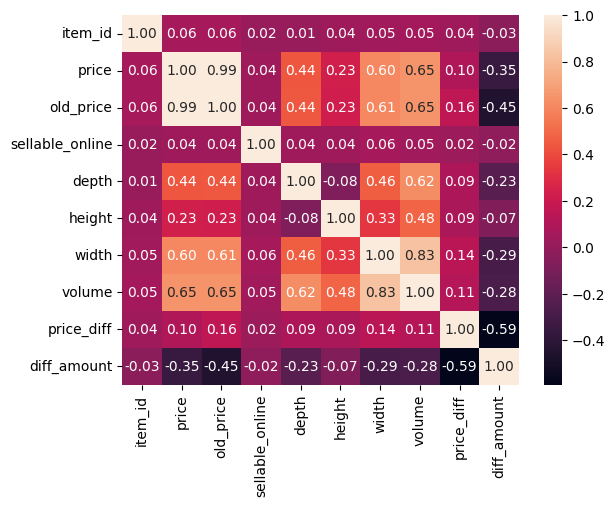

In [ ]:
# Create correlation Heatmap
correlation = ikea_clean.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()

price and old_price has higher correlation with width rather than two other dimension unit [ depth and height ], and both price and old_price are highly correlated with each others and obviously with price_diff.

From three types of product dimension, volume has highest correlation with width, followed with depth then height. volume also correlated with price and old_price

We will drop some column that can create multicolinearity, later for modelling purposes.

In [ ]:
# Let's do Descriptive Statistics with the dataframe
ikea_clean.describe()

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
count,3.694000e+03,3694.000000,3694.000000,3694.000000,3694.000000,3694.000000,3.694000e+03,3694.000000,3694.000000
mean,4.863240e+07,1078.208419,1125.014348,55.880211,98.524228,105.420953,7.058127e+05,0.177044,-46.805929
std,2.888709e+07,1374.652494,1443.543124,26.683012,55.201894,68.800229,9.146756e+05,0.381757,170.552565
min,5.848700e+04,3.000000,3.000000,1.000000,1.000000,1.000000,4.000000e+01,0.000000,-1997.000000
25%,2.039057e+07,180.900000,195.000000,40.000000,73.000000,60.000000,2.042400e+05,0.000000,0.000000
50%,4.928808e+07,544.700000,550.000000,46.500000,80.000000,80.000000,3.072000e+05,0.000000,0.000000
75%,7.040357e+07,1429.500000,1495.000000,65.000000,105.000000,141.000000,8.640000e+05,0.000000,0.000000
max,9.993262e+07,9585.000000,9985.000000,257.000000,700.000000,420.000000,1.362900e+07,1.000000,0.000000


# EXPLORATORY DATA ANALYSIS [EDA]

In [ ]:
# Distribution Plot
def show_distribution(feature):
    # define the subplot areas
    fig, axes = plt.subplots(1,4, figsize=(20,4))

    # plot the feature distribution
    sns.histplot(x=ikea_clean[feature[0]], cumulative=False,ax=axes[0],)
    axes[0].set_xlabel('width')
    axes[0].set_title("Distribution of width")

    # plot the feature distribution
    sns.histplot(x=ikea_clean[feature[1]], cumulative=False,ax=axes[1],)
    axes[1].set_xlabel('depth')
    axes[1].set_title("Distribution of depth")

    # plot the feature distribution
    sns.histplot(x=ikea_clean[feature[2]], cumulative=False,ax=axes[2],)
    axes[2].set_xlabel('height')
    axes[2].set_title("Distribution of height")

    # plot the feature distribution
    sns.histplot(x=ikea_clean[feature[3]], cumulative=False,ax=axes[3])
    axes[3].set_xlabel('volume')
    axes[3].set_title("Distribution of volume")

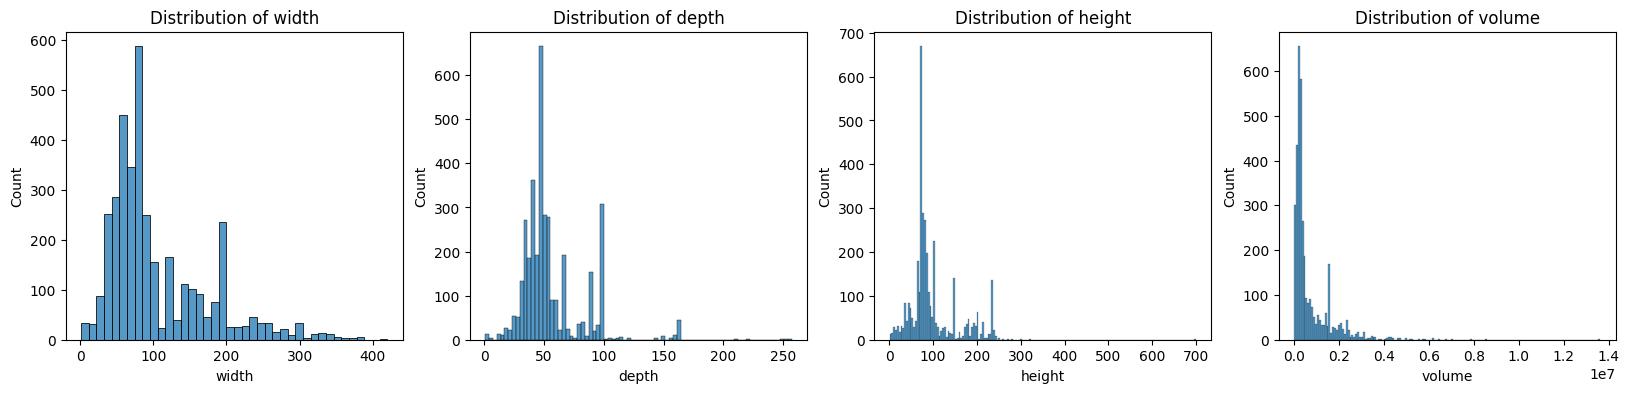

In [ ]:
# Distribution Plot for Product Dimension [ width, depth, height, volume ]

show_distribution(feature=['width','depth','height','volume'])

In [ ]:
# Distribution Plot
def show_distribution(feature):
    # define the subplot areas
    fig, axes = plt.subplots(1,2, figsize=(20,5))

    # plot the feature distribution
    sns.histplot(x=ikea_clean[feature[0]], cumulative=False,ax=axes[0],)
    axes[0].set_xlabel('price')
    axes[0].set_title("Distribution of price")

    # plot the feature distribution
    sns.histplot(x=ikea_clean[feature[1]], cumulative=False,ax=axes[1])
    axes[1].set_xlabel('old_price')
    axes[1].set_title("Distribution of old_price")


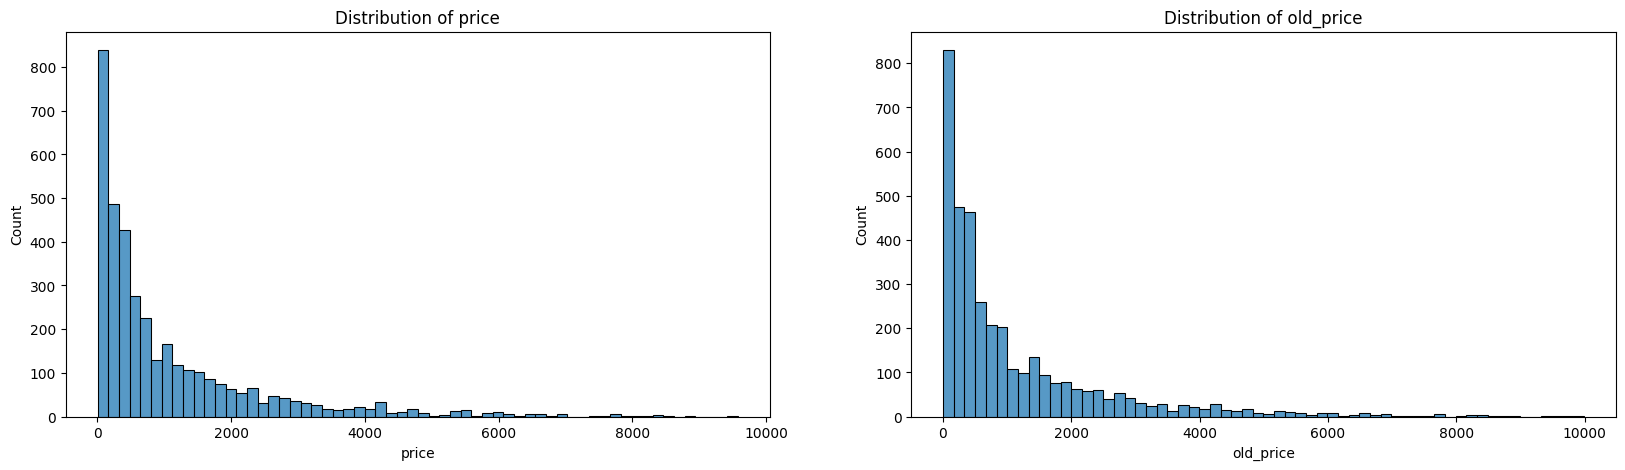

In [ ]:
# Distribution Plot for Product price and old_price

show_distribution(feature=['price','old_price'])

All distribution plot for product dimension and price are skewed to the right, which means the mean value is greater than the median value for each feature, and dominated with product with lower price, and smaller **size**

In [ ]:
# Most Produced Product Category

product_category=ikea_clean[['category','item_id']].groupby('category',as_index=False)['item_id'].count().rename(columns=({'item_id':'count'})).sort_values('count',ascending=False)

In [ ]:
product_category

,category,count
14,Tables & desks,612
2,Bookcases & shelving units,548
5,Chairs,481
12,Sofas & armchairs,428
3,Cabinets & cupboards,292
16,Wardrobes,236
9,Outdoor furniture,216
1,Beds,208
13,TV & media furniture,190
6,Chests of drawers & drawer units,125


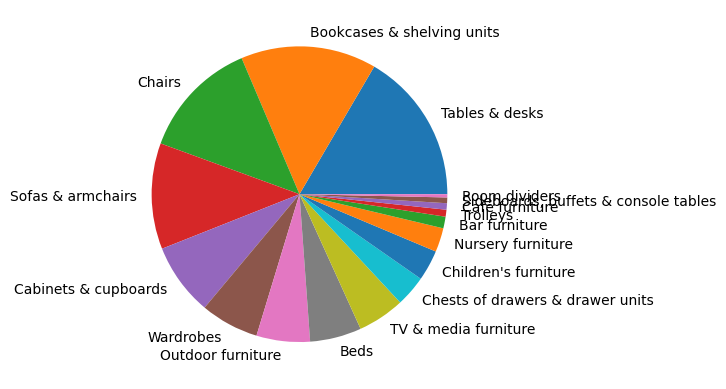

In [ ]:
plt.pie(product_category['count'], labels = product_category['category'])
plt.show()

IKEA mostly produced Table and Desks with more than 600 different products. Followed by Bookcases and Shelving Units, and then Chairs.

The least product category produced by IKEA is Room Dividers, well probably because customers doesn’t need it as much as the TOP 3 Product Categories.

In [ ]:
# Product Comparison on Price, Colors, and Online Availability
price_diff=ikea_clean[['price_diff','item_id']].groupby('price_diff',as_index=False)['item_id'].count().rename(columns=({'item_id':'count'})).sort_values('count',ascending=False)
online=ikea_clean[['sellable_online','item_id']].groupby('sellable_online',as_index=False)['item_id'].count().rename(columns=({'item_id':'count'})).sort_values('count',ascending=False)
colors=ikea_clean[['other_colors','item_id']].groupby('other_colors',as_index=False)['item_id'].count().rename(columns=({'item_id':'count'})).sort_values('count',ascending=False)

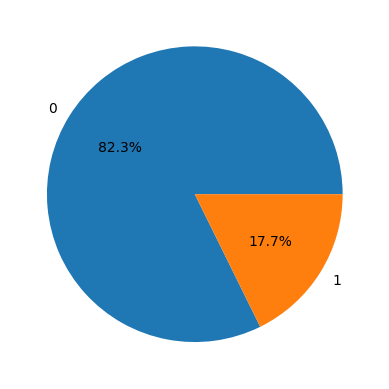

In [ ]:
plt.pie(price_diff['count'], labels = price_diff['price_diff'],autopct='%1.1f%%')
plt.show()

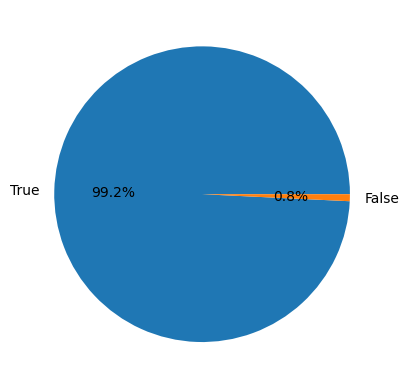

In [ ]:
plt.pie(online['count'], labels = online['sellable_online'],autopct='%1.1f%%')
plt.show()

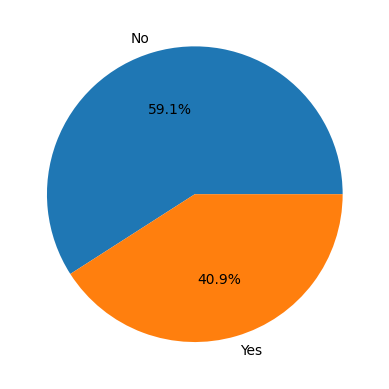

In [ ]:
plt.pie(colors['count'], labels = colors['other_colors'],autopct='%1.1f%%')
plt.show()

Product that has no price difference, or has no old_price, are much more than product that has price difference. It means, IKEA prefer to launch a new line of product to attract more customer and stay strong in such a competitive market.

Product that has other color options and product that only has one color, is almost has the same proportion.

Most of IKEA products are available online.

Text(0.5, 1.0, 'Relationship Between Price with Old Price')

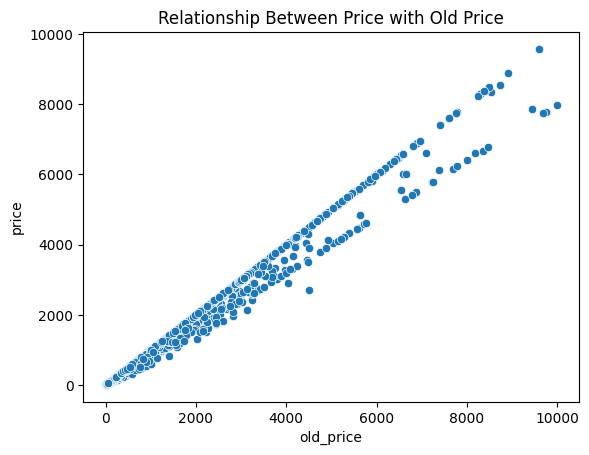

In [ ]:
# The Relationship Between Price with Old Price and Product Volume/Dimension
sns.scatterplot(x='old_price',y='price',data=ikea_clean)
plt.xlabel('old_price')
plt.ylabel('price')
plt.title('Relationship Between Price with Old Price')

Text(0.5, 1.0, 'Relationship Between Price with volume')

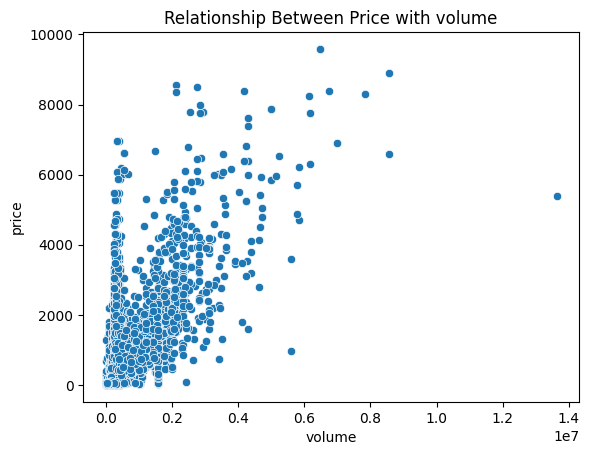

In [ ]:
# The Relationship Between Price with Old Price and Product Volume/Dimension
sns.scatterplot(x='volume',y='price',data=ikea_clean)
plt.xlabel('volume')
plt.ylabel('price')
plt.title('Relationship Between Price with volume')

There are linear connection between price and old_price, the higher the price the value of old_price also increase.
The dimension or volume of the products also affect the price. The bigger the product, the higher the price will be, like wardrobe, sofa, beds, table and desk.

(array([0, 1]), [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

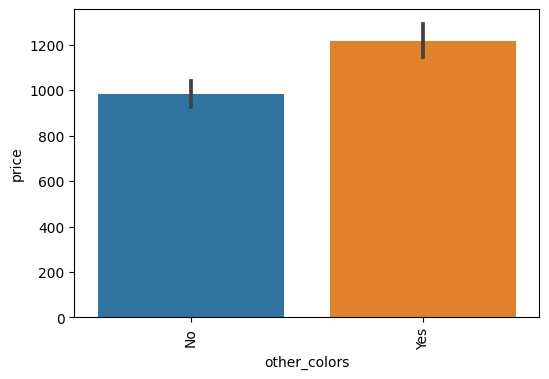

In [ ]:
plt.figure(figsize=[6, 4])

sns.barplot(data=ikea_clean, y='price', x='other_colors')
plt.xticks(rotation=90)

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

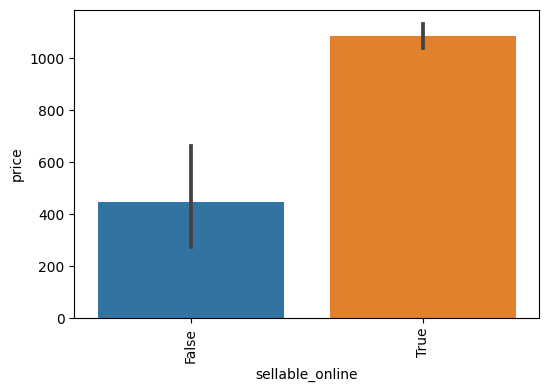

In [ ]:
plt.figure(figsize=[6, 4])

sns.barplot(data=ikea_clean, y='price', x='sellable_online')
plt.xticks(rotation=90)

other_colors availability kind of affect the product price but not that much, eventhough, product with more than one color option, still has a chance of higher product price probability. Product that available online or sellable_online, also has higher product price probability than product that is not available online.

Almost all product in IKEA are available online, but the other colors availability of the product is not that much. Probably because IKEA more focused on functional home products at the lowest prices, so they tend to create as many as product types, and not the varieties of colors from one product.


# PRICE PREDICTION WITH LINEAR **REGRESSION**

In [ ]:

# creating numerical dataframe : df_numericals

ikea_clean_numericals = ikea_clean.drop(labels = ['name','category','link', 'other_colors',
                                  'designer', 'sellable_online', 'short_description'], axis = 1)
ikea_clean_numericals.head()

,item_id,price,old_price,depth,height,width,volume,price_diff,diff_amount
0,90420332,265.0,265.0,47.0,99.0,51.0,237303.0,0,0.0
1,368814,995.0,995.0,47.0,105.0,80.0,394800.0,0,0.0
2,9333523,2095.0,2095.0,47.0,102.0,48.0,230112.0,0,0.0
3,80155205,69.0,69.0,50.0,100.0,60.0,300000.0,0,0.0
4,30180504,225.0,225.0,60.0,43.0,74.0,190920.0,0,0.0


In [ ]:
# creating categorical dataframe : df_categoricals

ikea_clean_categoricals = ikea_clean.drop(labels = ['item_id','depth','height', 'width',
                                    'volume', 'price_diff', 'price',
                                    'old_price', 'diff_amount'], axis = 1)
ikea_clean_categoricals.head()

,name,category,sellable_online,link,other_colors,short_description,designer
0,FREKVENS,Bar furniture,True,https://www.ikea.com/sa/en/p/frekvens-bar-tabl...,No,"Bar table, in/outdoor, 51x51 cm",Nicholai Wiig Hansen
1,NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-bar-tab...,No,"Bar table, 140x80 cm",Francis Cayouette
2,NORDVIKEN / NORDVIKEN,Bar furniture,False,https://www.ikea.com/sa/en/p/nordviken-nordvik...,No,Bar table and 4 bar stools,Francis Cayouette
3,STIG,Bar furniture,True,https://www.ikea.com/sa/en/p/stig-bar-stool-wi...,Yes,"Bar stool with backrest, 74 cm",Henrik Preutz
4,NORBERG,Bar furniture,True,https://www.ikea.com/sa/en/p/norberg-wall-moun...,No,"Wall-mounted drop-leaf table, ...",Marcus Arvonen


In [ ]:

# drop unused column : item_id, link, short description, old_price

ikea_clean_numericals = ikea_clean_numericals.drop(['item_id', 'old_price'], axis = 1)

ikea_clean_categoricals = ikea_clean_categoricals.drop(['link', 'short_description'], axis = 1)

In [ ]:

# Encoding the df_categoricals, for modeling

from sklearn.preprocessing import LabelEncoder
col = list(ikea_clean_categoricals)
ikea_clean_categoricals[col] = ikea_clean_categoricals[col].apply(LabelEncoder().fit_transform)
ikea_clean_categoricals.head()

,name,category,sellable_online,other_colors,designer
0,123,0,1,0,333
1,387,0,0,0,163
2,390,0,0,0,163
3,493,0,1,1,189
4,380,0,1,0,310


In [ ]:
# combining between df_numericals with df_categoricals

ikea_update = pd.concat([ikea_clean_categoricals, ikea_clean_numericals], axis=1, join='inner')

In [ ]:
ikea_update.head()

,name,category,sellable_online,other_colors,designer,price,depth,height,width,volume,price_diff,diff_amount
0,123,0,1,0,333,265.0,47.0,99.0,51.0,237303.0,0,0.0
1,387,0,0,0,163,995.0,47.0,105.0,80.0,394800.0,0,0.0
2,390,0,0,0,163,2095.0,47.0,102.0,48.0,230112.0,0,0.0
3,493,0,1,1,189,69.0,50.0,100.0,60.0,300000.0,0,0.0
4,380,0,1,0,310,225.0,60.0,43.0,74.0,190920.0,0,0.0


In [ ]:
# split train test
from sklearn.model_selection import train_test_split

X = ikea_update.drop(columns=['price','width','height','depth'])
y = ikea_update[['price']]

# First splitting: pretrain and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#linear model
linear=LinearRegression()
linear.fit(X_train,y_train)
y_pred=linear.predict(X_test)

print(linear.intercept_)
print('\n')
print(linear.coef_)
print('\n')
print(linear.score(X_test,y_test))


[31.88599376]


[[-8.95578267e-03  1.85227253e+01  1.14791578e+02 -6.41437558e+01
   8.11167185e-01  8.67561687e-04 -4.73074456e+02 -2.13266639e+00]]


0.4622814022605476


In [ ]:
# First splitting: pretrain and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#Ridge model

scores_RSME=[]
intercept=[]
for alpha in [0.01,0.1,1.0,10.0]:
  ridge=Ridge(alpha=alpha)
  ridge.fit(X_train,y_train)
  y_pred=ridge.predict(X_test)
  scores_RSME.append(np.sqrt(mean_squared_error(y_test,y_pred)))
  intercept.append(ridge.intercept_)

print(scores_RSME)
print('\n')
print(intercept)

[1018.0595552756598, 1018.0596161505231, 1018.0603483903291, 1018.0775393558471]


[array([31.93473726]), array([32.371419]), array([36.54772105]), array([65.11378791])]


In [ ]:
scores_RSME=[]
intercept=[]
for alpha in [0.01,0.1,1.0,10.0]:
  lasso=Lasso(alpha=alpha)
  lasso.fit(X_train,y_train)
  y_pred=lasso.predict(X_test)
  scores_RSME.append(np.sqrt(mean_squared_error(y_test,y_pred)))
  intercept.append(lasso.intercept_)

print(scores_RSME)
print('\n')
print(intercept)

[1018.0593675171074, 1018.0583111157569, 1018.0849188419621, 1018.2562478945996]


[array([33.14883242]), array([44.51438018]), array([141.29467281]), array([118.60929226])]


In [ ]:
ridge.intercept_

array([93.52911876])

In [ ]:
lasso.intercept_

array([231.01794202])